<a href="https://colab.research.google.com/github/Myavuzars/Image-Classifications-w-TensorFlow/blob/main/Bean_Image_Classificitions2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
print(tf.__version__)

2.4.0


In [2]:
(beans_train,beans_test), info = tfds.load("beans", with_info=True, split=["train", 'test'], as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incompleteNC7E0S/beans-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incompleteNC7E0S/beans-validation.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incompleteNC7E0S/beans-test.tfrecord


Dataset beans downloaded and prepared to /root/tensorflow_datasets/beans/0.1.0. Subsequent calls will reuse this data.


In [3]:
print(info)

tfds.core.DatasetInfo(
    name='beans',
    version=0.1.0,
    description='Beans is a dataset of images of beans taken in the field using smartphone
cameras. It consists of 3 classes: 2 disease classes and the healthy class.
Diseases depicted include Angular Leaf Spot and Bean Rust. Data was annotated
by experts from the National Crops Resources Research Institute (NaCRRI) in
Uganda and collected by the Makerere AI research lab.',
    homepage='https://github.com/AI-Lab-Makerere/ibean/',
    features=FeaturesDict({
        'image': Image(shape=(500, 500, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=1295,
    splits={
        'test': 128,
        'train': 1034,
        'validation': 133,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {beansdata,
        author="Makerere AI Lab",
        title="Bean disease dataset",
        month="January",
        year="2020",
        url="https://git

In [4]:
class_names= info.features['label'].names
print(class_names)

['angular_leaf_spot', 'bean_rust', 'healthy']


In [5]:
num_train_examples= info.splits['train'].num_examples
num_test_examples = info.splits['test'].num_examples
print(num_train_examples)
print(num_test_examples)

1034
128


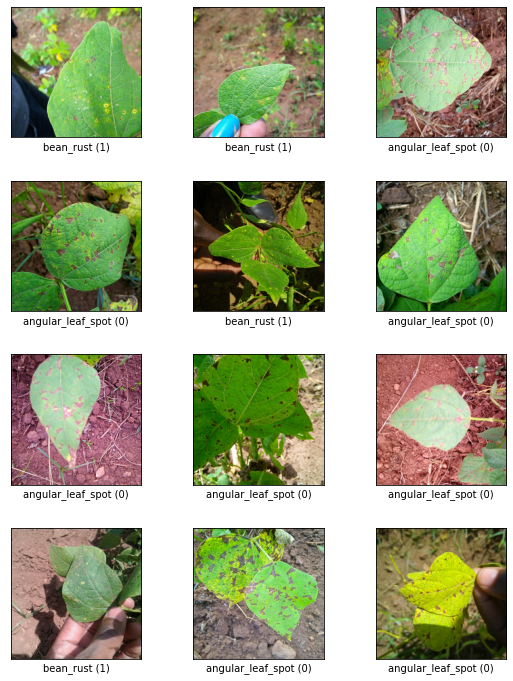

In [6]:
fig= tfds.show_examples(beans_train,info,rows=4, cols=3)

In [7]:
def normalize_img(image, label):
  image = tf.cast(image, tf.float32)
  image = image/255.0
  return image, label




In [8]:
train_data = beans_train.map(normalize_img)
test_data = beans_test.map(normalize_img)


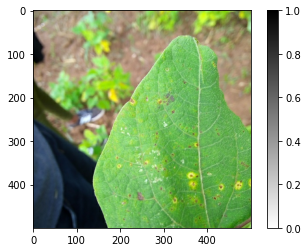

In [9]:
import matplotlib.pyplot as plt
for image, label in train_data.take(3):
  break

image= image.numpy().reshape((500,500,3))


plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
# Build the Model

model= tf.keras.Sequential([tf.keras.layers.Conv2D(32,(3,3), input_shape=(500,500,3), activation ='relu'),
                            tf.keras.layers.MaxPooling2D(2,2),
                            
                            tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
                            tf.keras.layers.MaxPooling2D(2,2),

                            tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
                            tf.keras.layers.MaxPooling2D(2,2),

                            tf.keras.layers.Dropout(0.4),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(128,activation='relu'),
                            tf.keras.layers.Dense(3, activation='softmax')

                            ])

In [11]:
#Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Note that SPARSE CATEGORICAL works with integer categoricalvariable, if you do not specify Softmax, then we should add (from_logits=True)

In [12]:
batch_size=24
train_dataset =train_data.cache().repeat().shuffle(num_train_examples).batch(batch_size)
test_dataset = test_data.cache().batch(batch_size)

In [13]:
import math
#Fit the model
model.fit(train_dataset,
          epochs=3, 
          steps_per_epoch= math.ceil(num_train_examples/batch_size))

Epoch 1/3
44/44 [==============================] - 15s 159ms/step - loss: 7.0278 - accuracy: 0.4324
Epoch 2/3
44/44 [==============================] - 7s 158ms/step - loss: 0.7023 - accuracy: 0.6851
Epoch 3/3
44/44 [==============================] - 7s 158ms/step - loss: 0.6033 - accuracy: 0.7183


In [14]:
#Evaluate Accuracy
test_loss, test_accuracy  = model.evaluate(test_dataset, steps = math.ceil(num_test_examples/batch_size))

print('Accuracy on test dataset:', test_accuracy)

6/6 [==============================] - 1s 162ms/step - loss: 0.5475 - accuracy: 0.7969
Accuracy on test dataset: 0.796875


In [15]:
#predicted= model.predict(test_dataset, batch_size= 24, verbose=0)
#pred= []
#for clas in predicted:
#  pred.append(np.argmax(clas))
   
#print(len(pred))
#print(pred)

In [16]:
predicts =np.argmax(model.predict(test_dataset), axis=-1)
print(list(predicts))
print(len(predicts))

[0, 1, 2, 2, 2, 0, 1, 1, 0, 1, 0, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 1, 0, 0, 2, 1, 2, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 0, 2, 1, 1, 2, 0, 0, 1, 2, 2, 1, 1, 0, 2, 0, 2, 0, 2, 0, 1]
128


In [17]:
labels=[]
for test_images, test_labels  in test_data:
  labels.append(test_labels.numpy().tolist())
print((labels))



[0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 0, 1, 1, 2, 2, 2, 1, 0, 2, 1, 1, 0, 2, 2, 2, 2, 0, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 2, 2, 0, 1, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 2, 1, 2, 0, 0, 2, 2, 2, 0, 1, 2, 0, 0, 2, 1, 2, 0, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 1, 2, 0, 1, 0, 0, 0, 2, 2, 0, 0, 1, 2, 2, 1, 0, 0, 2, 0, 2, 1, 2, 0, 1]


In [18]:
tf.math.confusion_matrix(
    labels, predicts, num_classes=3, weights=None, dtype=tf.dtypes.int32,
    name=None
)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[29, 10,  4],
       [ 5, 35,  3],
       [ 0,  4, 38]], dtype=int32)>

In [ ]:
#Make Prediction for specific items
for test_images, test_labels  in test_dataset.take(1):

  test_images = test_images.numpy()
  test_labels= test_labels.numpy()
  predictions = model.predict(test_images) 

In [ ]:
predictions.shape  # return batch size and class number

(24, 3)

In [ ]:
print(predictions[0])
np.argmax(predictions[0])

[0.3828412  0.27282098 0.3443378 ]


0

In [ ]:
test_labels[0]

0

In [ ]:
# Graph 10 prdictions with actual label

def plot_image(i, predictions_array, true_label, images):
  predictions_array, true_label, img= predictions_array[i], true_label[i], images[i]

  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label =np.argmax(predictions_array)
  if predicted_label ==true_label:
    color = 'blue'
  else:
    color = 'red'


  plt.xlabel("{}  {:2.0f}% ({})". format (class_names[predicted_label], 100*np.max(predictions_array),class_names[true_label]),
             color=color)





In [ ]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label =predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(3), predictions_array, color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

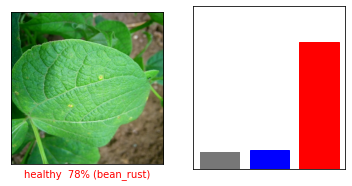

In [ ]:
i=3
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

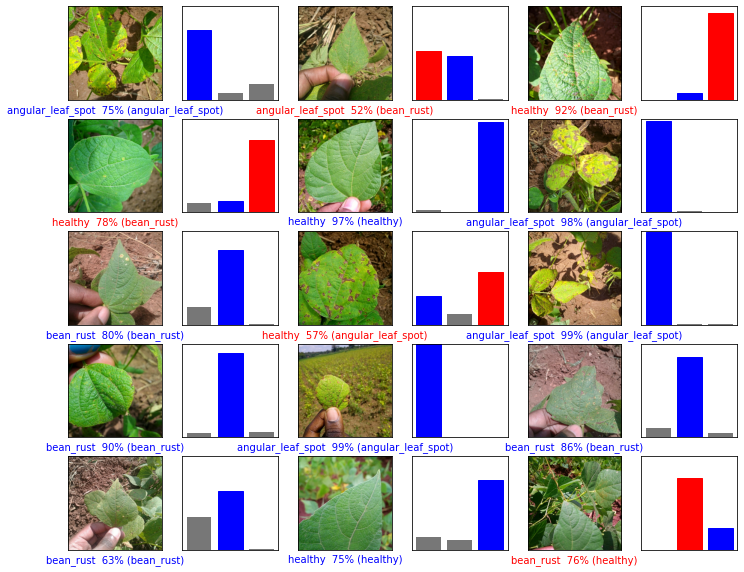

In [ ]:
#Plotting several images

num_rows = 5
num_cols = 3
num_images= num_rows*num_cols

plt.figure(figsize = (2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
